# Лабараторная №1. Основы предобработки данных 

**Беляков Тимофей гр.3530903/70302<br>
Федоров Андрей гр.3530903/70302**

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Вопросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

#### 1. В какой шкале представлены все признаки в наборе?

> {<b>credit_history</b>, <b>purpose</b>, <b>personal_status</b>, <b>property_magnitude</b>, <b>housing</b>, <b>foreign_worker</b>, <b>class</b>} - номинальные признаки

> {<b>checking_status</b>, <b>savings_status</b>, <b>employment</b>, <b>job</b>} - порядковые признаки

> {<b>duration</b>, <b>credit_amount</b>, <b>age</b>, <b>existing_credits</b>, <b>num_dependents</b>} - абсолютные признаки

In [35]:
path='data/credit_3530903_70302.csv'
credit_df = pd.read_csv(path, index_col=0)
credit_df.head(20)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,male single,no known property,35.0,for free,1.0,unskilled resident,2.0,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,male single,life insurance,53.0,own,1.0,skilled,1.0,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,male single,car,35.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,male div/sep,real estate,61.0,NaN,1.0,unskilled resident,1.0,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,male mar/wid,car,28.0,NaN,2.0,high qualif/self emp/mgmt,1.0,yes,bad


In [32]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     501 non-null    object 
 1   duration            501 non-null    float64
 2   credit_history      501 non-null    object 
 3   purpose             501 non-null    object 
 4   credit_amount       501 non-null    float64
 5   savings_status      501 non-null    object 
 6   employment          501 non-null    object 
 7   personal_status     501 non-null    object 
 8   property_magnitude  501 non-null    object 
 9   age                 501 non-null    float64
 10  housing             474 non-null    object 
 11  existing_credits    501 non-null    float64
 12  job                 501 non-null    object 
 13  num_dependents      501 non-null    float64
 14  foreign_worker      501 non-null    object 
 15  class               501 non-null    object 
dtypes: float

#### 2. Укажите признак с наименьшей дисперсией.<br>
> <b>num_dependents</b>

In [34]:
credit_df.describe()

,duration,credit_amount,age,existing_credits,num_dependents
count,501.000,501.000,501.000,501.000,501.000
mean,20.315,3344.756,35.605,1.393,1.144
std,12.103,5154.839,11.740,0.568,0.351
min,4.000,0.000,15.000,1.000,1.000
25%,12.000,1288.000,27.000,1.000,1.000
50%,18.000,2197.000,33.000,1.000,1.000
75%,24.000,3915.000,42.000,2.000,1.000
max,60.000,100042.000,89.000,4.000,2.000


In [33]:
print("   Dispersions\n")
std = credit_df.std()
for key in std.keys():
    print(key, round(std[key]**2, 3))

   Dispersions

duration 146.48
credit_amount 26572367.377
age 137.827
existing_credits 0.323
num_dependents 0.123


#### 3. Среднее какого признака отличается для двух классов сильнее всего?<br>
> <b>credit_amount</b>

In [18]:
print("   Class = good\n")
print(credit_df[credit_df["class"] == 'good'].mean(), "\n")
print("   Class = bad\n")
print(credit_df[credit_df["class"] == 'bad'].mean())

   Class = good

duration              18.456
credit_amount       2794.648
age                   35.821
existing_credits       1.398
num_dependents         1.140
dtype: float64 

   Class = bad

duration              25.255
credit_amount       4806.358
age                   35.029
existing_credits       1.380
num_dependents         1.153
dtype: float64


#### 4. В каком классе больше всего skilled работников?<br>
> <b>good</b>

In [19]:
print("   Class = good\n")
print(credit_df[(credit_df["job"] == "skilled") & (credit_df["class"] == "good")].count()[0], "\n")
print("   Class = bad\n")
print(credit_df[(credit_df["job"] == "skilled") & (credit_df["class"] == "bad")].count()[0])

   Class = good

232 

   Class = bad

80


#### 5. Есть ли в наборе признаки с выбросами? Какие?<br>

<AxesSubplot:>

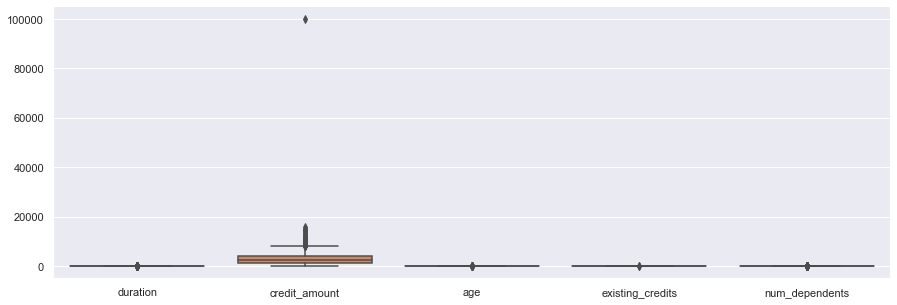

In [20]:
fig = plt.subplots(figsize=(15,5))
sns.boxplot(data=credit_df)

<AxesSubplot:>

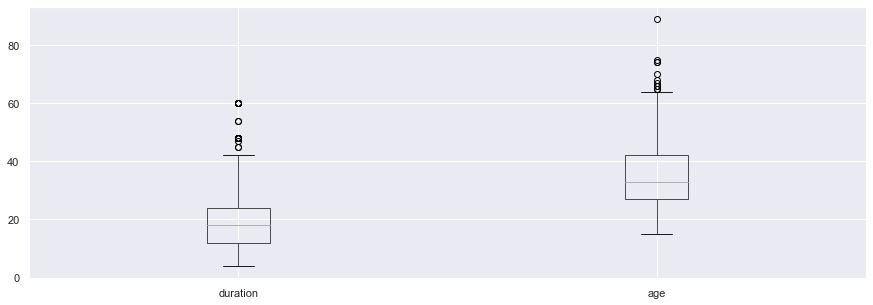

In [21]:
fig = plt.subplots(figsize=(15,5))
credit_df.boxplot(column = ['duration', 'age'])

<AxesSubplot:>

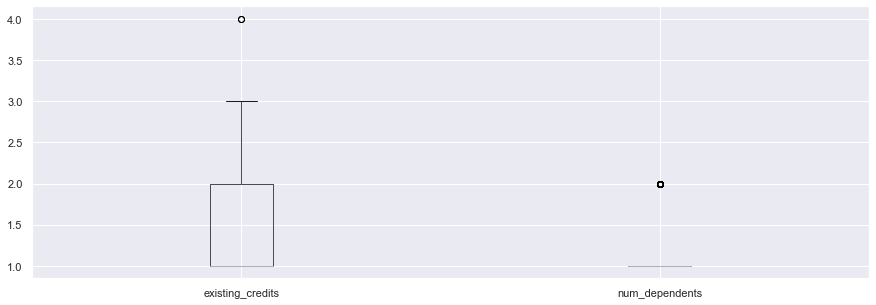

In [22]:
fig = plt.subplots(figsize=(15,5))
credit_df.boxplot(column = ['existing_credits', 'num_dependents'])

#### 6. Сколько пропущенных значений в наборе?<br>

Признаки с нулевыми значениями:

In [41]:
for column in credit_df.columns:
    count = (credit_df[column] == 0).sum()
    if (count > 0):
        print(column,"=", count, "нулевых значений")

credit_amount = 12 нулевых значений


Признаки с null значениями:

In [42]:
for column in credit_df.columns:
    count = credit_df[column].isnull().sum()
    if (count > 0):
        print(column,"=", count, "NaN значений")

housing = 27 NaN значений


#### 7. Попытайтесь заполнить пропущенные значения.<br> 
*Заполним пропуски признака housing значениями -1 (также строки можно и удалить):*

*Абсолютные признаки можно заполнить средним значением, модой или медианой*

In [25]:
new_credit_df = credit_df.fillna(-1)

In [26]:
new_credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
purpose               0
credit_amount         0
savings_status        0
employment            0
personal_status       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
foreign_worker        0
class                 0
dtype: int64

#### 8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>

► **Абсолютный** признак **credit_amount**:

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

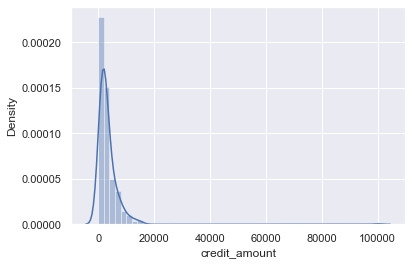

In [43]:
sns.distplot(credit_df['credit_amount'])

Избавимся от выбросов:

<AxesSubplot:xlabel='credit_amount'>

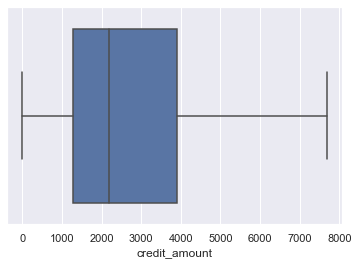

In [46]:
credit_df['credit_amount'] = credit_df.credit_amount.clip(upper=credit_df.credit_amount.quantile(0.92))
sns.boxplot(x='credit_amount', data=credit_df)

Построим диаграмму без выбросов:

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

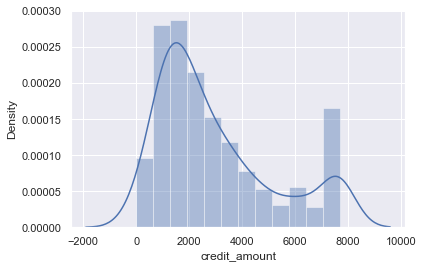

In [47]:
sns.distplot(credit_df['credit_amount'])

 ► **Порядковый** признак **job** и **employment**:

<AxesSubplot:>

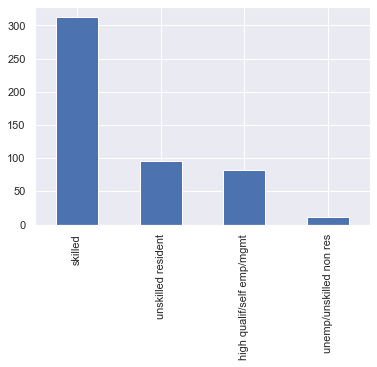

In [48]:
credit_df['job'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='employment', ylabel='count'>

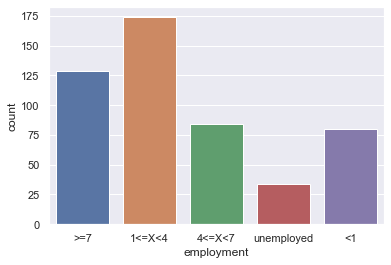

In [49]:
sns.countplot(x='employment', data=credit_df)

► **Номинальный** признак **class** с **количественными** **age** и **credit_amount**:

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


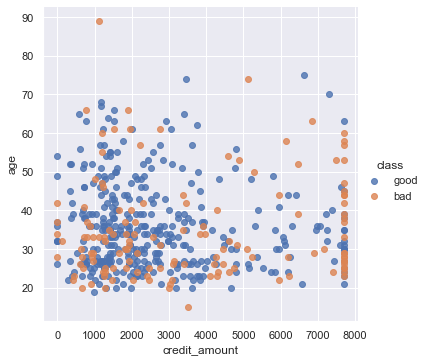

In [50]:
sns.lmplot('credit_amount', 'age', data=credit_df, hue='class', fit_reg=False);

#### 9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

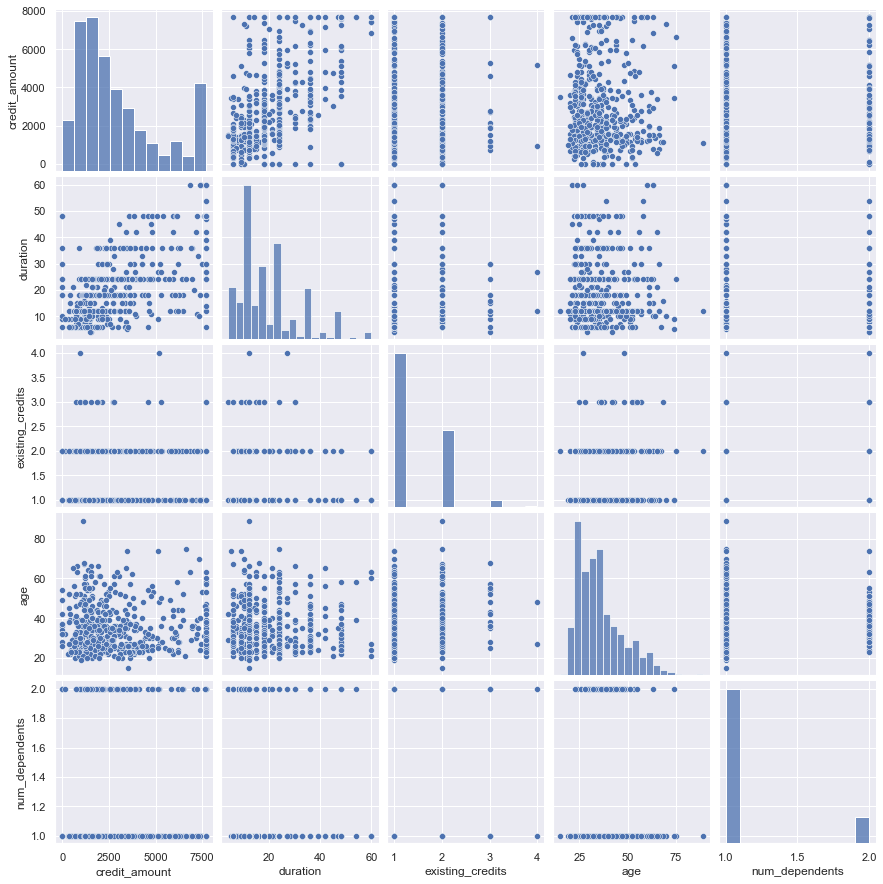

In [56]:
num_columns = list(set(['duration', 'credit_amount', 'age', 'existing_credits', 'num_dependents']))
sns.pairplot(credit_df[num_columns])

> Основную часть кредитов берут люди до 50 лет. <br>
> Молодые (до 40 лет) стремятся брать кредиты на меньший срок и меньшую сумму. <br>
> Также чем выше сумма кредита, тем дольше срок его погашения. <br>

In [23]:
corr_matrix = credit_df[num_columns].corr()
corr_matrix

,num_dependents,age,existing_credits,duration,credit_amount
num_dependents,1.000,0.106,0.107,-0.014,0.031
age,0.106,1.000,0.152,-0.037,-0.012
existing_credits,0.107,0.152,1.000,-0.031,0.035
duration,-0.014,-0.037,-0.031,1.000,0.594
credit_amount,0.031,-0.012,0.035,0.594,1.000


<AxesSubplot:>

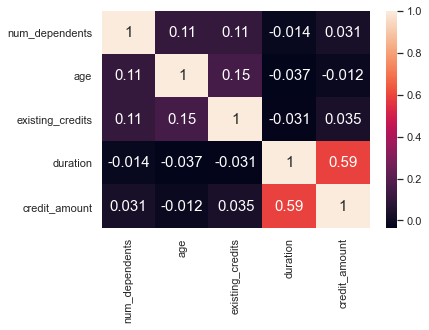

In [24]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":15})

> Чем выше сумма кредита, тем дольше срок погашения и наоборот.

#### 10. Какой признак(и) имеет смысл стандартизировать? Почему?
> Стандартизировать стоит признак **age**. Потому что это упрощает анализ данных, да и везде, впринципе, используются возрастные группы.

In [46]:
bins = [18,25,35,45,55,65,75,85,95]
group_names = ['18-25', '25-35', '35-45', '45-55','55-65','65-75','75-85','85-95']
credit_df['age_equal'] = pd.cut(credit_df['age'], bins, labels=group_names)

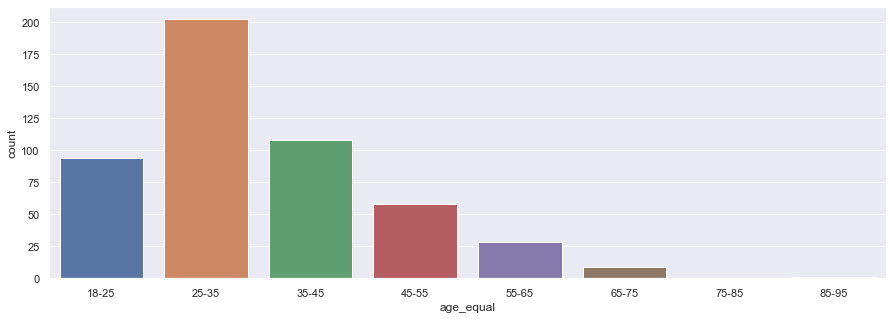

In [47]:
fig = plt.subplots(figsize=(15, 5))
sns.countplot(x='age_equal', data=credit_df);

> Также можно попробовать стандартизировать признак **credit_amount**.

In [50]:
bins = [0,2500,3500,4500,5500,7500,8500]
group_names = ['small', 'pre-Intermediate', 'intermediate', 'upper intermediate','big','large']
credit_df['credit_rate'] = pd.cut(credit_df['credit_amount'], bins, labels=group_names)

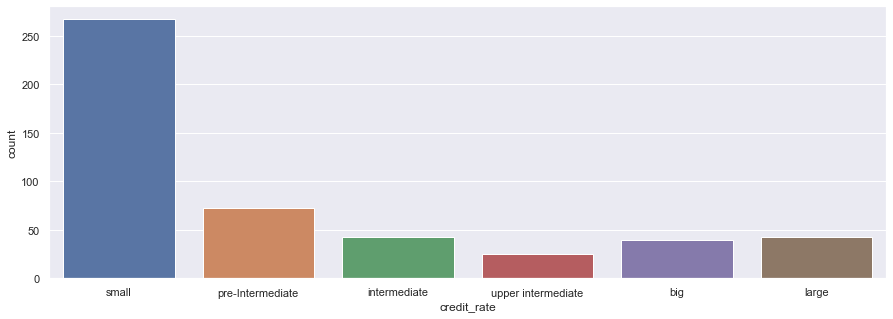

In [51]:
fig = plt.subplots(figsize=(15, 5))
sns.countplot(x='credit_rate', data=credit_df);

#### 11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.

> **Reсent_searches** - было бы весьма информативно знать насколько усердно клиент оставляет заявки на кредит в ближайшее время. Используется в американском скоринге FICO. Слишком "агрессивный" поиск кредита ухудшает оценку.